In [46]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
!pip install face_recognition

In [48]:
    
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


image_of_bill = face_recognition.load_image_file('/content/gdrive/My Drive/app/face_recognition_examples-master/img/known/Bill Gates.jpg')
bill_face_encoding = face_recognition.face_encodings(image_of_bill)[0]

image_of_steve = face_recognition.load_image_file('/content/gdrive/My Drive/app/face_recognition_examples-master/img/known/Steve Jobs.jpg')
steve_face_encoding = face_recognition.face_encodings(image_of_steve)[0]

image_of_elon = face_recognition.load_image_file('/content/gdrive/My Drive/app/face_recognition_examples-master/img/known/Elon Musk.jpg')
elon_face_encoding = face_recognition.face_encodings(image_of_elon)[0]

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
#  Create arrays of encodings and names
known_face_encodings = [
  bill_face_encoding,
  steve_face_encoding,
  elon_face_encoding
]

known_face_names = [
  "Bill Gates",
  "Steve Jobs",
  "Elon Musk"
]

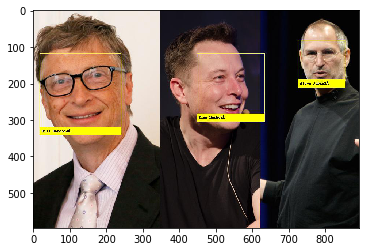

In [51]:
# Load test image to find faces in
test_image = face_recognition.load_image_file('/content/gdrive/My Drive/app/face_recognition_examples-master/img/groups/bill-steve-elon.jpg')

# Find faces in test image
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

# Convert to PIL format
pil_image = Image.fromarray(test_image)

# Create a ImageDraw instance
draw = ImageDraw.Draw(pil_image)

# Loop through faces in test image
for(top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "Unknown Person"

  # If match
  if True in matches:
    first_match_index = matches.index(True)
    name = known_face_names[first_match_index]
  
  # Draw box
  draw.rectangle(((left, top), (right, bottom)), outline=(255,255,0))

  # Draw label
  text_width, text_height = draw.textsize(name)
  draw.rectangle(((left,bottom - text_height - 10), (right, bottom)), fill=(255,255,0), outline=(255,255,0))
  draw.text((left + 6, bottom - text_height - 5), name, fill=(0,0,0))

del draw

# Display image
pil_image.show()

# Save image
pil_image.save('/content/gdrive/My Drive/app/face_recognition_examples-master/img/results/identify.jpg')


test_image = face_recognition.load_image_file('/content/gdrive/My Drive/app/face_recognition_examples-master/img/results/identify.jpg')
plt.imshow(test_image)

